In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [2]:
experiment = "MOS2_150uW_9K"
ref_file = 'data/GGHO_2023.05.30_THZ1_000'  # 0001 to 0005 .txt
sample_file = 'data/GGHO_2023.05.30_THZ1_003'  # 0032 to 0036 .txt
start_ref = 1
stop_ref = 5
start_sample = 2
stop_sample = 6
assert stop_ref - start_ref == stop_sample - start_sample

In [3]:
def plot_my_freq_array(freqs, complex_array, half=False):
    N = len(freqs)
    if half:
        last = N//2
    else:
        last = N
    plt.plot(freqs[0:last], np.real(complex_array)[0:last], 'xr', label='real')
    plt.plot(freqs[0:last], -1.0 * np.imag(complex_array)[0:last], 'xb', label='imag')
    # plt.plot(freqs[0:last], np.abs(complex_array)[0:last], 'xg', label='abs')
    plt.legend()
    plt.grid()
    # plt.show()
    plt.savefig(experiment+'_fft_average.png')

In [4]:
index_ref = start_ref
index_sample = start_sample

ref_file_index = ref_file + str(index_ref) + '.txt'
# print(ref_file_index)
ref = np.loadtxt(fname=ref_file_index, delimiter=' ')

sample_file_index = sample_file + str(index_sample) + '.txt'
# print(sample_file_index)
sample = np.loadtxt(fname=sample_file_index, delimiter=' ')

index_ref +=1
index_sample +=1

while index_ref <= stop_ref:
    ref_file_index = ref_file + str(index_ref) + '.txt'
    # print(ref_file_index)
    ref += np.loadtxt(fname=ref_file_index, delimiter=' ')

    sample_file_index = sample_file + str(index_sample) + '.txt'
    # print(sample_file_index)
    sample += np.loadtxt(fname=sample_file_index, delimiter=' ')
    
    index_ref +=1
    index_sample +=1

In [5]:
ref = ref / (1 + stop_ref - start_ref)
sample = sample / (1 + stop_sample - start_sample)

Text(0.5, 1.0, 'averaged ref data, columns 1 and 2, against column 0')

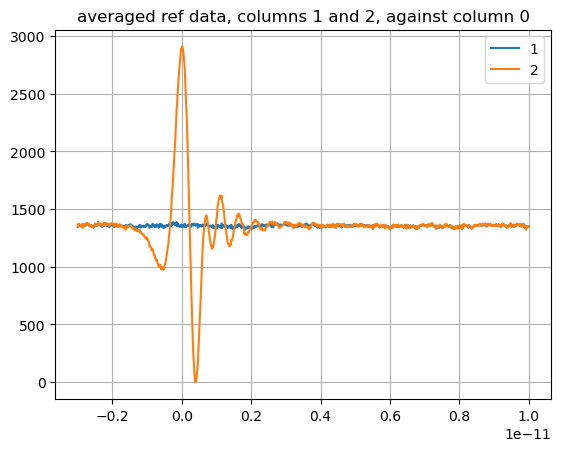

In [8]:
# plt.ylim((-500, 3500))
for col in range(1, ref.shape[1]):
    plt.plot(ref[:, 0], ref[:, col], label=str(col))
plt.legend()
plt.grid()
plt.title('averaged ref data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'averaged ref data, columns 2 - 1, against column 0')

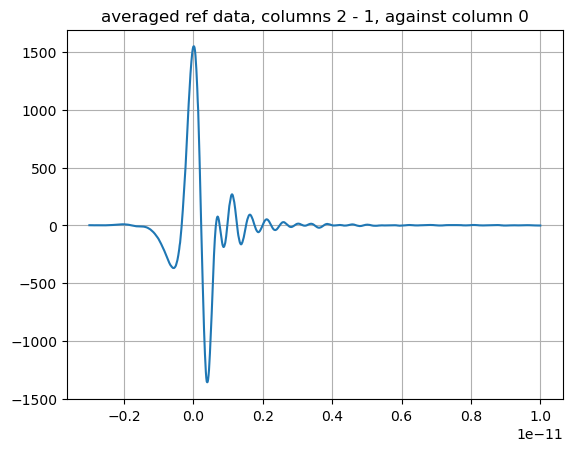

In [10]:
plt.plot(ref[:, 0], ref[:, 2] - ref[:, 1])
plt.grid()
plt.title('averaged ref data, columns 2 - 1, against column 0')

Text(0.5, 1.0, 'averaged sample data, columns 1 and 2, against column 0')

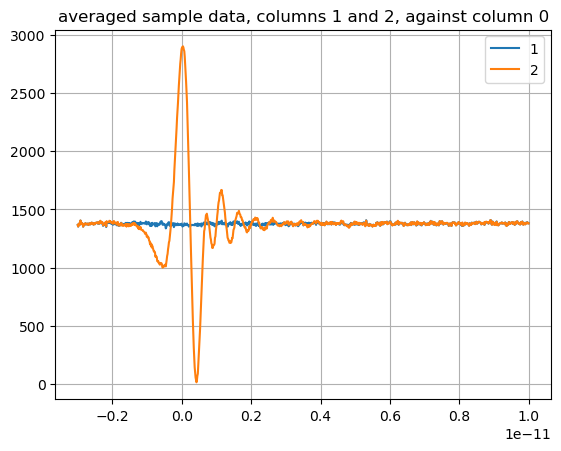

In [11]:
# plt.ylim((-500, 3500))
for col in range(1, sample.shape[1]):
    plt.plot(sample[:, 0], sample[:, col], label=str(col))
plt.legend()
plt.grid()
plt.title('averaged sample data, columns 1 and 2, against column 0')

Text(0.5, 1.0, 'averaged sample data, columns 2 - 1, against column 0')

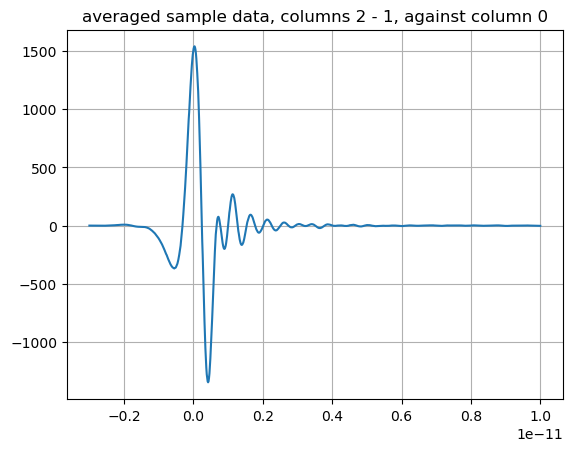

In [12]:
plt.plot(sample[:, 0], sample[:, 2] - sample[:, 1])
plt.grid()
plt.title('averaged sample data, columns 2 - 1, against column 0')